<a href="https://colab.research.google.com/github/SanePai/Neural_Networks-Assignment-2/blob/main/Question_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
import os
from PIL import Image
import glob 
import PIL
import keras 
import tensorflow as tf #importing tensorflow as backend
import sklearn
import numpy as np
import pandas as pd
import scipy.io as sio 
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from keras.models import Sequential,Model
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Dropout,MaxPooling2D,MaxPool2D,BatchNormalization
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
from sklearn.utils import shuffle


In [33]:
X=[]
y=[]
img_dir = "/content/drive/MyDrive/NNFL/Assignment 2/class1_images/class1_images/"
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files:
  X.append(np.asarray((Image.open(f1)).resize((128,128))))
  y.append(0)
img_dir = "/content/drive/MyDrive/NNFL/Assignment 2/class2_images/class2_images"  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files:
  X.append(np.asarray((Image.open(f1)).resize((128,128))))
  y.append(1)
img_dir = "/content/drive/MyDrive/NNFL/Assignment 2/class3_images/class3_images"  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files:
  X.append(np.asarray((Image.open(f1)).resize((128,128))))
  y.append(2)

In [34]:
X=np.asarray(X)
y=np.asarray(y)
X=X/255.0

In [35]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=0)
train_X,valid_X,train_y,valid_y=train_test_split(train_X,train_y,test_size=1/8,train_size=7/8,random_state=0)

In [36]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters = 8, kernel_size = (3,3), input_shape=(128, 128, 3), padding = "same"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
  model.add(Activation('relu'))
  
  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "same"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
  
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(3, 3), padding='same'))
  #model.add(Activation('relu'))
  
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same"))
  model.add(Flatten())
  
  model.add(Dense(128))
  model.add(Activation('relu'))
  
  model.add(Dense(64))
  model.add(Dropout(0.3))
  model.add(Activation('relu'))
  
  model.add(Dense(32))
  model.add(Activation('relu'))
  
  model.add(Dense(16))
  model.add(Dropout(0.3))
  model.add(Activation('relu'))
  
  model.add(Dense(3))
  model.add(Activation('softmax'))
  return model


In [37]:
modelf=create_model()
modelf.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 128, 128, 8)       224       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 128, 128, 8)       0         
_________________________________________________________________
activation_150 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 128, 128, 16)      1168      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 43, 43, 32)      

In [38]:
modelf.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=modelf.fit(train_X, train_y, epochs=30, batch_size=15,validation_data=(valid_X,valid_y))
print(history)

Train on 504 samples, validate on 72 samples
Epoch 1/30
504/504 [==============================] - 1s 2ms/sample - loss: 1.1352 - accuracy: 0.3175 - val_loss: 1.0992 - val_accuracy: 0.3056
Epoch 2/30
504/504 [==============================] - 0s 842us/sample - loss: 1.0982 - accuracy: 0.3611 - val_loss: 1.0979 - val_accuracy: 0.3056
Epoch 3/30
504/504 [==============================] - 0s 818us/sample - loss: 1.0998 - accuracy: 0.3571 - val_loss: 1.0928 - val_accuracy: 0.3889
Epoch 4/30
504/504 [==============================] - 0s 857us/sample - loss: 1.1011 - accuracy: 0.3234 - val_loss: 1.0940 - val_accuracy: 0.4028
Epoch 5/30
504/504 [==============================] - 0s 815us/sample - loss: 1.0980 - accuracy: 0.3532 - val_loss: 1.0890 - val_accuracy: 0.3889
Epoch 6/30
504/504 [==============================] - 0s 816us/sample - loss: 1.0977 - accuracy: 0.3492 - val_loss: 1.0985 - val_accuracy: 0.3056
Epoch 7/30
504/504 [==============================] - 0s 852us/sample - loss: 1.0

Text(0.5, 0, 'Epochs')

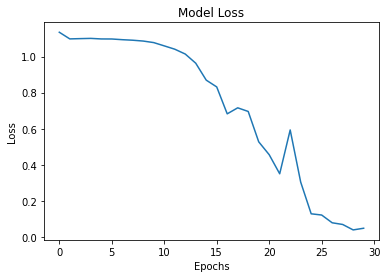

In [39]:
#plotting the loss graph
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')


In [40]:
#Confusion Matrix
test_y=test_y+1
y_pred=np.argmax(modelf.predict(test_X), axis=-1)+1
cm=pd.crosstab(test_y,y_pred)
print("Confusion matrix:\n")
cm

Confusion matrix:



col_0,1,2,3
row_0,,,
1,41,1,0
2,0,54,0
3,3,0,45


In [41]:
print("Individual class accuracy:")
cm=confusion_matrix(test_y,y_pred)
for i in range(3):
  print(f'Class {i+1} accuracy: ', end="")
  print((cm.diagonal()/cm.sum(axis=1))[i] *100) #Individual Class Accuracy

Individual class accuracy:
Class 1 accuracy: 97.61904761904762
Class 2 accuracy: 100.0
Class 3 accuracy: 93.75


In [42]:
print(f"Overall Accuracy: {np.sum(y_pred==test_y)/len(test_y) *100}%")

Overall Accuracy: 97.22222222222221%


In [43]:
def call_model(tr_x,tr_y):
  modelk=create_model()
  modelk.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  modelk.fit(tr_x,tr_y, epochs=20, batch_size=15,verbose=0,shuffle=False)
  return modelk

In [44]:
j=1
Xs, ys = shuffle(X, y,random_state=0)
kf=KFold(n_splits=10)
accs = 0
for train,test in kf.split(Xs):
    print()
    print(f"Fold {j}:")
    j=j+1
    tr_x,tr_y,ts_x,ts_y=Xs[train],ys[train],Xs[test],ys[test]
    tf.compat.v1.disable_eager_execution()
    y_pred=np.argmax(call_model(tr_x,tr_y).predict(ts_x), axis=-1)
    cm=confusion_matrix(ts_y,y_pred)
    print("Confusion matrix:")
    print(cm)
    print("Individual class accuracy:")
    for i in range(3):
        print(f"Class {i+1}: ", end = "")
        print((cm.diagonal()/cm.sum(axis=1))[i] *100) #Individual Class Accuracy
    acc = np.sum(y_pred==ts_y)/len(ts_y)
    accs += acc
    print(f"Overall Accuracy: {acc*100}%")
    print("====================================")

print(f"Average Accuracy: {accs*100/10}%")


Fold 1:
Confusion matrix:
[[17  1  0]
 [ 0 21  0]
 [ 0  0 33]]
Individual class accuracy:
Class 1: 94.44444444444444
Class 2: 100.0
Class 3: 100.0
Overall Accuracy: 98.61111111111111%

Fold 2:
Confusion matrix:
[[24  0  0]
 [ 0 33  0]
 [ 1  0 14]]
Individual class accuracy:
Class 1: 100.0
Class 2: 100.0
Class 3: 93.33333333333333
Overall Accuracy: 98.61111111111111%

Fold 3:
Confusion matrix:
[[19  0  0]
 [ 0 31  0]
 [ 0  0 22]]
Individual class accuracy:
Class 1: 100.0
Class 2: 100.0
Class 3: 100.0
Overall Accuracy: 100.0%

Fold 4:
Confusion matrix:
[[31  0  0]
 [ 0 23  0]
 [ 0  0 18]]
Individual class accuracy:
Class 1: 100.0
Class 2: 100.0
Class 3: 100.0
Overall Accuracy: 100.0%

Fold 5:
Confusion matrix:
[[22  0  0]
 [ 0 27  1]
 [ 0  0 22]]
Individual class accuracy:
Class 1: 100.0
Class 2: 96.42857142857143
Class 3: 100.0
Overall Accuracy: 98.61111111111111%

Fold 6:
Confusion matrix:
[[17  0  4]
 [ 0 28  0]
 [ 0  0 23]]
Individual class accuracy:
Class 1: 80.95238095238095
Class